### Importing necessary libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

###Reading the data

In [140]:
col = ['A'+str(i) for i in range(1,17)]

In [141]:
col

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16']

In [142]:
df = pd.read_csv('crx.data',header=None,names=col)

In [143]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Data Analysis

#### Number of instances and features

In [144]:
df.shape

(690, 16)

690 instances and 16 features.

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

#### Get the attribute data types

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Could see that few column datatypes are incorrect especially A14 is continuous as per the description but pandas treating as object. A11 also marked as continuous in description but pandas treated as int8.

Lets deep dive into these columns

In [146]:
df['A14'].unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '?', '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [147]:
df['A14'].value_counts()[0:20]

00000    132
00200     35
00120     35
00160     34
00100     30
00080     30
00280     22
00180     18
00140     16
00240     14
00320     14
?         13
00300     13
00260     11
00400      9
00060      9
00220      9
00340      7
00360      7
00380      5
Name: A14, dtype: int64

we could see that the nan represented as "?". We need to convert the "?" into proper nan. lets re-read our dataset with some additional nan parameter

#### Identify the NULL values

In [148]:
df = pd.read_csv('crx.data',header=None,names=col,na_values = "?")

In [149]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Lets see the percentage of the null values with respect to columns

In [150]:
res = pd.DataFrame(df.isnull().sum()).reset_index()
res['Percentage'] = round(res[0] / df.shape[0] * 100, 2)
res['Percentage'] = res['Percentage'].astype(str) + '%'
res.rename(columns = {'index':'Column', 0:'Number of null values'})

,Column,Number of null values,Percentage
0,A1,12,1.74%
1,A2,12,1.74%
2,A3,0,0.0%
3,A4,6,0.87%
4,A5,6,0.87%
5,A6,9,1.3%
6,A7,9,1.3%
7,A8,0,0.0%
8,A9,0,0.0%
9,A10,0,0.0%


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


#### Identify class balance/imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


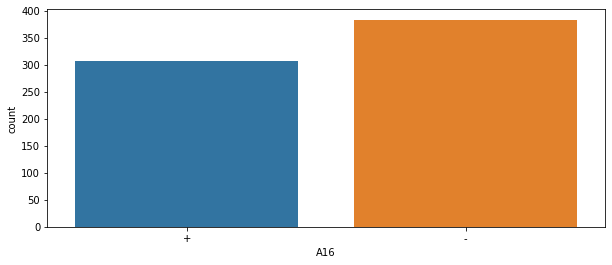

In [152]:
fig = plt.figure(figsize=(10, 4))
sns.countplot(df['A16'])
plt.show()

In [153]:
df['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [154]:
df['A16'].value_counts()/len(df['A16'])*100

-    55.507246
+    44.492754
Name: A16, dtype: float64

we could see that the class is properly balanced

#### Identify numerical and categorical columns

In [155]:
num_columns = [feature for feature in df.columns if df[feature].dtypes!='O']
cat_columns1 = [feature for feature in df.columns if df[feature].dtypes == 'O' ]

In [156]:
num_columns

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [157]:
cat_columns1

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

In [158]:
print(f"Number of numerical columns are {len(num_columns)}")
print(f"Number of categorical columns are {len(cat_columns1)}")

Number of numerical columns are 6
Number of categorical columns are 10


In [159]:
df['A15'].value_counts()/len(df['A15'])

0       0.427536
1       0.042029
500     0.014493
1000    0.014493
2       0.013043
          ...   
1704    0.001449
857     0.001449
6700    0.001449
2503    0.001449
750     0.001449
Name: A15, Length: 240, dtype: float64

#### Distribution of numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c13f1790>,
      dtype=object)

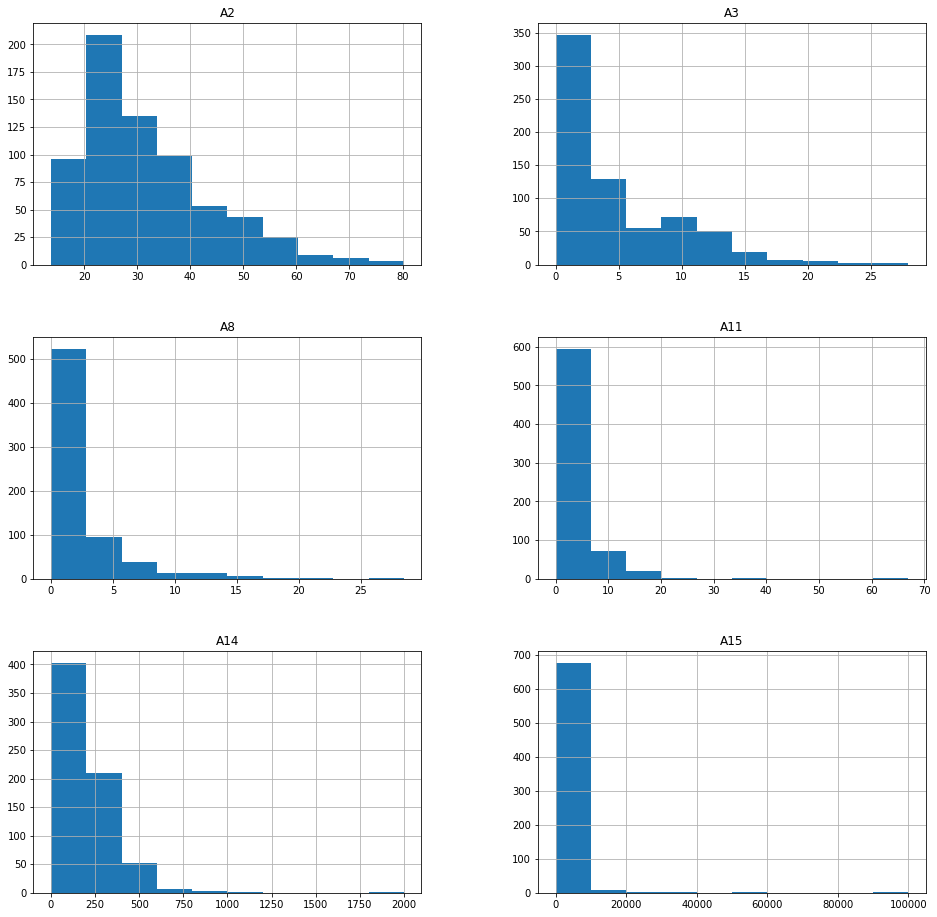

In [160]:
df[num_columns].hist(figsize=(16,16))

most of the features are log normal distributed

#### Categorical columns distribution

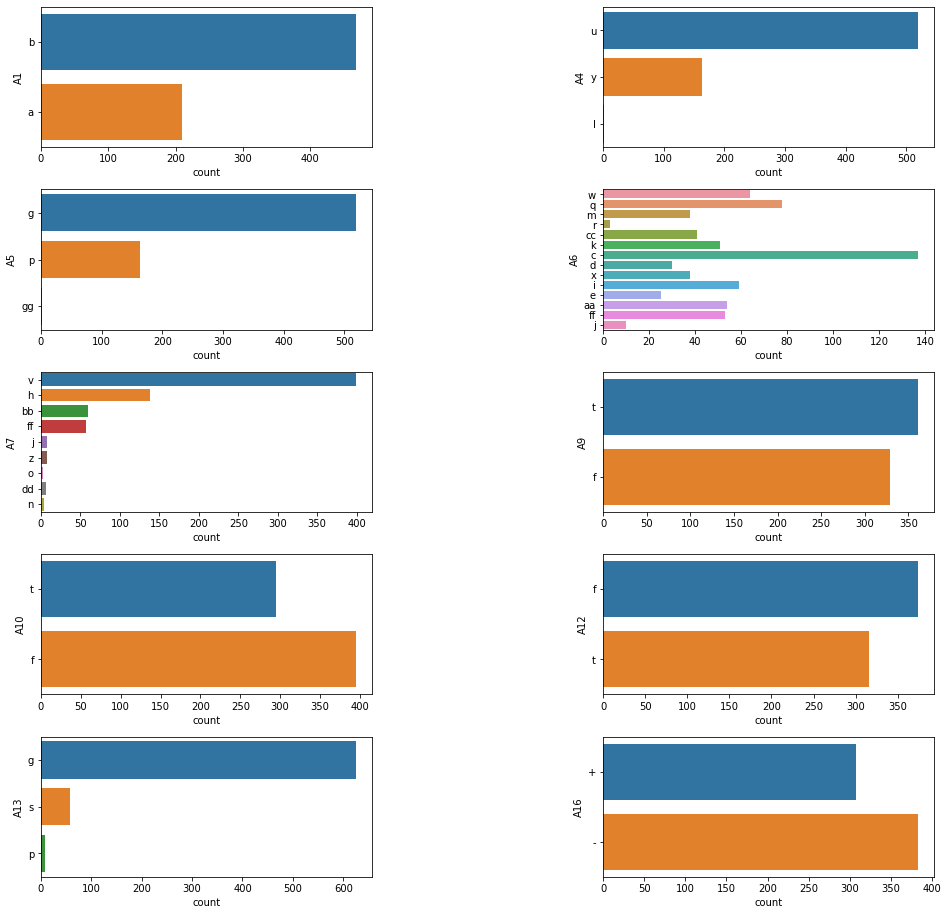

In [161]:
fig, axes = plt.subplots(5, 2, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = cat_columns1[i], data=df, ax=ax)
plt.show()

#### Summary of data

In [162]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


### Visualizations

Lets see how categorical columns related to target

#### Categorical columns related to target - Bar Graph

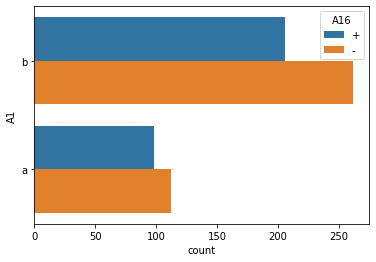

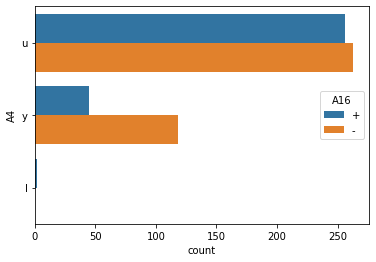

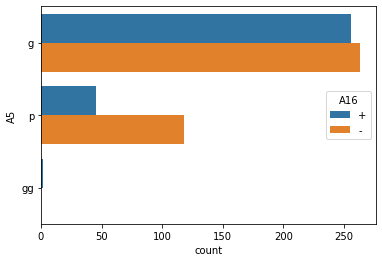

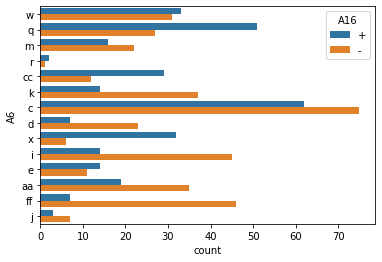

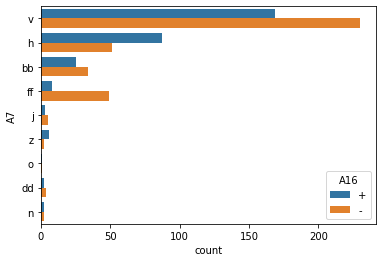

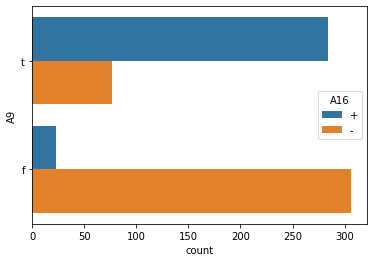

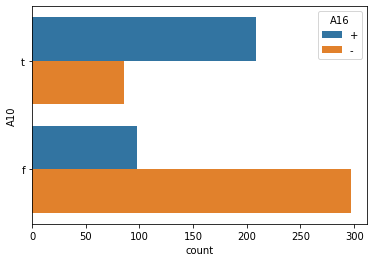

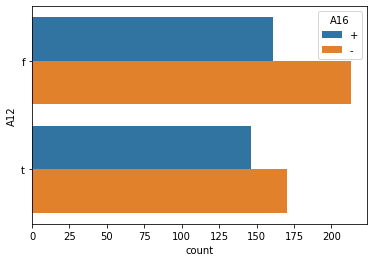

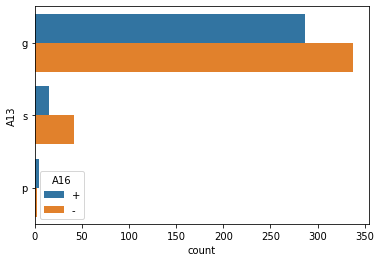

In [163]:
for i in cat_columns1:
  if i != 'A16':
    sns.countplot(y = i, hue = 'A16', data=df)
    plt.show()

#### Relation between Numerical variables

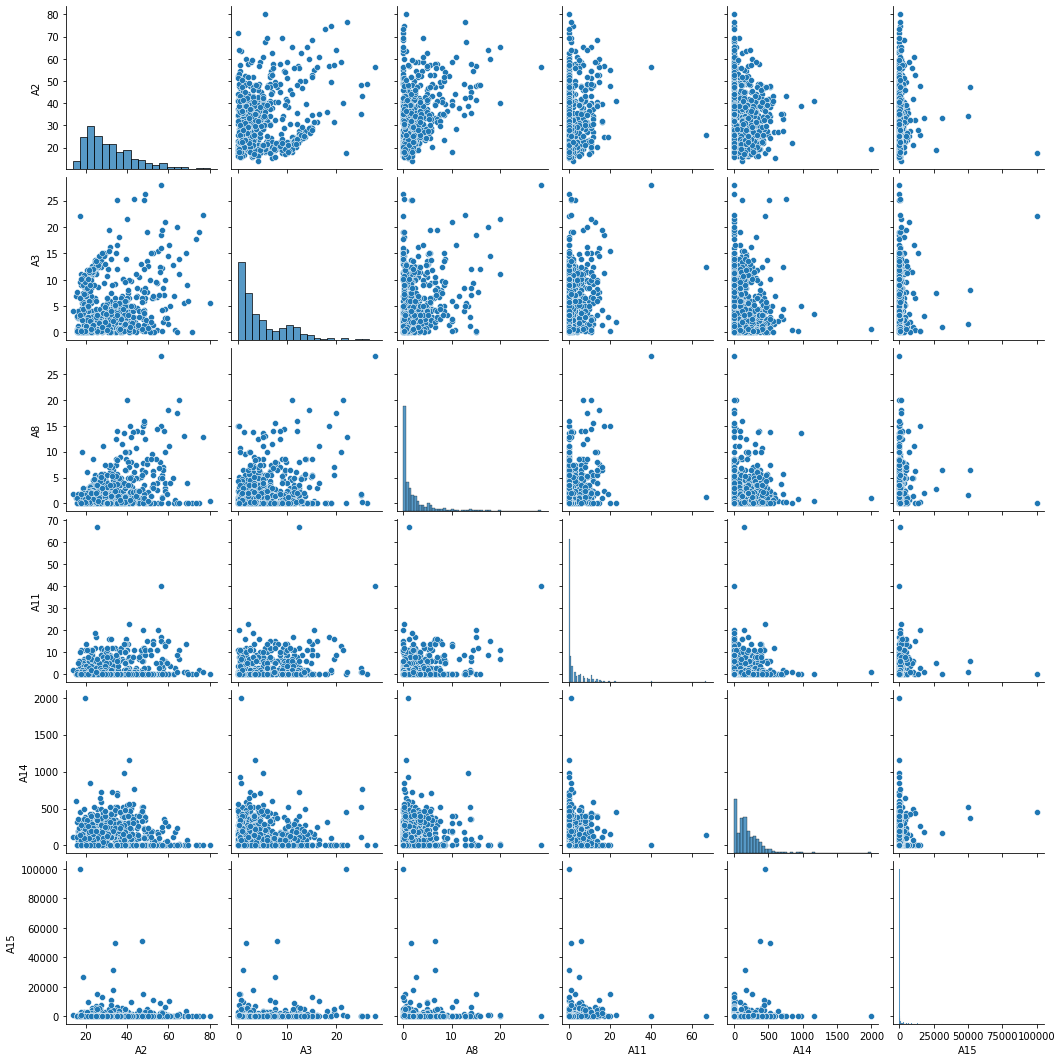

In [164]:
sns.pairplot(df)

#### Relation between Numerical variables and Target

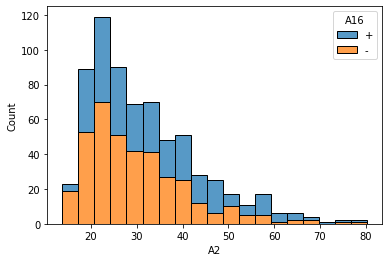

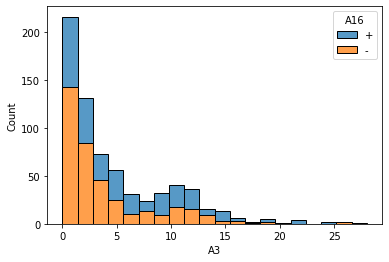

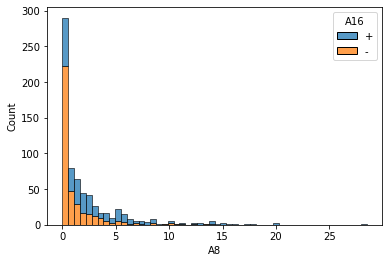

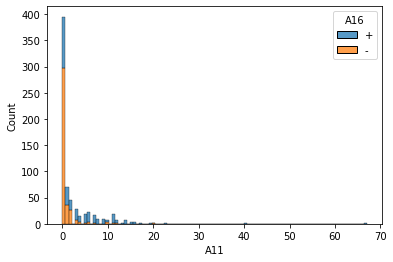

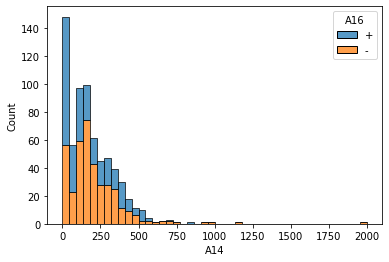

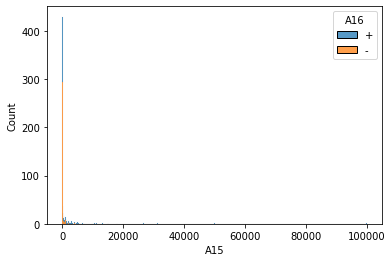

In [165]:
for i in num_columns:
  sns.histplot(df,x=i, hue="A16", multiple="stack")
  plt.show()

#### Comparing some columns with Target

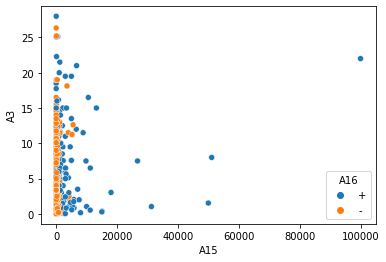

In [166]:
sns.scatterplot(x='A15',y='A3',data=df,hue='A16')

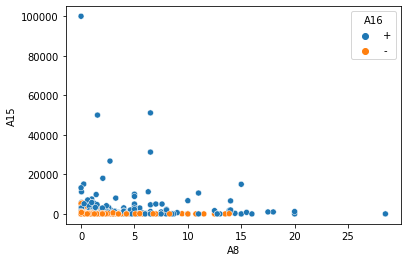

In [167]:
sns.scatterplot(x='A8',y='A15',data=df,hue='A16')

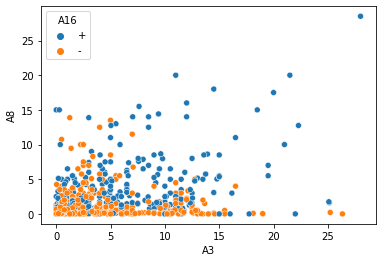

In [168]:
sns.scatterplot(x='A3',y='A8',data=df,hue='A16')

#### Correlation

In [169]:
corr1 = df.corr()

In [170]:
corr1

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


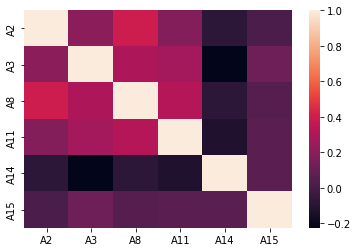

In [171]:
sns.heatmap(corr1)

A2 and A8 are correlated somewhat

### Outliers detection

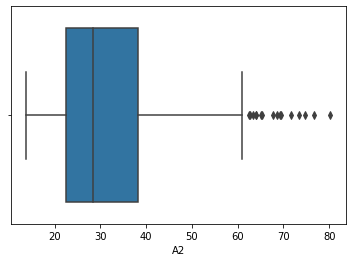

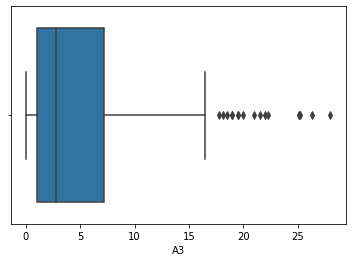

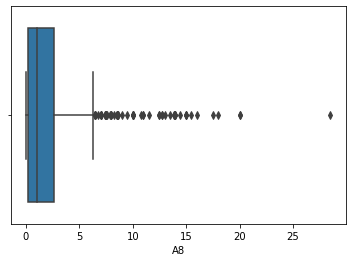

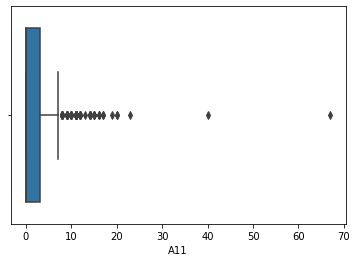

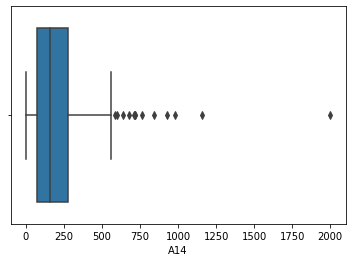

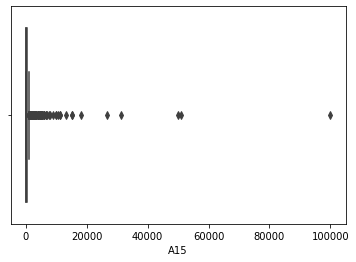

In [172]:
for i in num_columns:
  sns.boxplot(x=i,data=df)
  plt.show()

In [173]:
data = df.select_dtypes(exclude = 'object')
    
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
    
ans = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outlier_df = pd.DataFrame(ans).reset_index().rename(columns = {'index':'column', 0:'count_of_outliers'})

In [174]:
outlier_df

,column,count_of_outliers
0,A2,16
1,A3,17
2,A8,63
3,A11,79
4,A14,13
5,A15,113


### Feature Engineering

#### Fill NAN values

In [175]:
features_with_nan = [{features: df[features].dtypes} for features in df.columns if df[features].isnull().sum()>=1]

In [176]:
features_with_nan

[{'A1': dtype('O')},
 {'A2': dtype('float64')},
 {'A4': dtype('O')},
 {'A5': dtype('O')},
 {'A6': dtype('O')},
 {'A7': dtype('O')},
 {'A14': dtype('float64')}]

We could see that feature A2 and A14 are numerical features and having outliers. So it is good to fill the nan values with median imputation or some other way as the mean imputation will impact with outliers

In [199]:
data = df.copy()

In [200]:
data[['A2','A3']][0:20]

,A2,A3
0,30.83,0.000
1,58.67,4.460
2,24.50,0.500
3,27.83,1.540
4,20.17,5.625
5,32.08,4.000
6,33.17,1.040
7,22.92,11.585
8,54.42,0.500
9,42.50,4.915


In [201]:
data[['A14','A3']][0:20]

,A14,A3
0,202.0,0.000
1,43.0,4.460
2,280.0,0.500
3,100.0,1.540
4,120.0,5.625
5,360.0,4.000
6,164.0,1.040
7,80.0,11.585
8,180.0,0.500
9,52.0,4.915


In [202]:
for i in features_with_nan:
  for keys,values in i.items():
    if values == "object":
      data[keys] = data[keys].fillna(data[keys].mode()[0])
    else:
      data[keys] = data[keys].fillna(data[keys].median())


In [203]:
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [204]:
data['A1'].unique()

array(['b', 'a'], dtype=object)

In [205]:
data['A14'].unique()

array([ 202.,   43.,  280.,  100.,  120.,  360.,  164.,   80.,  180.,
         52.,  128.,  260.,    0.,  320.,  396.,   96.,  200.,  300.,
        145.,  500.,  168.,  434.,  583.,   30.,  240.,   70.,  455.,
        311.,  216.,  491.,  400.,  239.,  160.,  711.,  250.,  520.,
        515.,  420.,  980.,  443.,  140.,   94.,  368.,  288.,  928.,
        188.,  112.,  171.,  268.,  167.,   75.,  152.,  176.,  329.,
        212.,  410.,  274.,  375.,  408.,  350.,  204.,   40.,  181.,
        399.,  440.,   93.,   60.,  395.,  393.,   21.,   29.,  102.,
        431.,  370.,   24.,   20.,  129.,  510.,  195.,  144.,  380.,
         49.,   50.,  381.,  150.,  117.,   56.,  211.,  230.,  156.,
         22.,  228.,  519.,  253.,  487.,  220.,   88.,   73.,  121.,
        470.,  136.,  132.,  292.,  154.,  272.,  340.,  108.,  720.,
        450.,  232.,  170., 1160.,  411.,  460.,  348.,  480.,  640.,
        372.,  276.,  221.,  352.,  141.,  178.,  600.,  550., 2000.,
        225.,  210.,

In [206]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

In [207]:
for feature in cat_columns1:
    print("The feature name is {} and the number of categories are {}".format(feature,len(data[feature].unique())))

The feature name is A1 and the number of categories are 2
The feature name is A4 and the number of categories are 3
The feature name is A5 and the number of categories are 3
The feature name is A6 and the number of categories are 14
The feature name is A7 and the number of categories are 9
The feature name is A9 and the number of categories are 2
The feature name is A10 and the number of categories are 2
The feature name is A12 and the number of categories are 2
The feature name is A13 and the number of categories are 3
The feature name is A16 and the number of categories are 2


#### Change the Target column values

In [208]:
data['A16'] = np.where(data['A16'] == '+',1,0)

In [209]:
data['A16'].unique()

array([1, 0])

####Dropping duplicates

In [210]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(690, 16)
(690, 16)


There are no duplicates

#### Fixing the outliers

Lets see what are the values are in upper cap ( Q3 + 1.5 * IQR)

In [211]:
columns = ['A2','A3','A8','A11','A14','A15']

for i in columns:
    print(i, " : ",' above: ', data[i].quantile(0.75) + 
                      1.5*(data[i].quantile(0.75) - data[i].quantile(0.25)), 'are outliers')

A2  :   above:  60.26374999999999 are outliers
A3  :   above:  16.518749999999997 are outliers
A8  :   above:  6.3149999999999995 are outliers
A11  :   above:  7.5 are outliers
A14  :   above:  560.0 are outliers
A15  :   above:  988.75 are outliers


In [212]:
for i in columns:
  outlier_cap = data[i].quantile(0.75) + 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
  data[i] = np.where(data[i]>outlier_cap,outlier_cap,data[i])
              

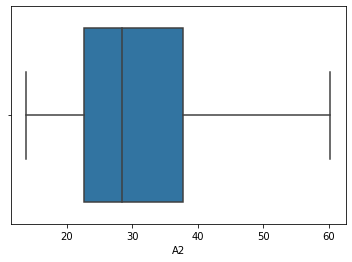

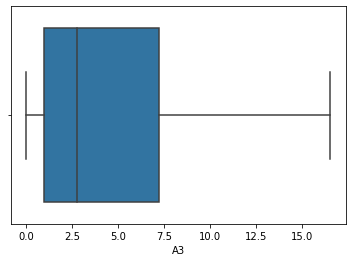

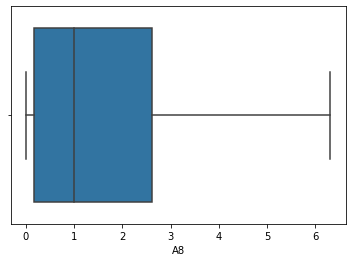

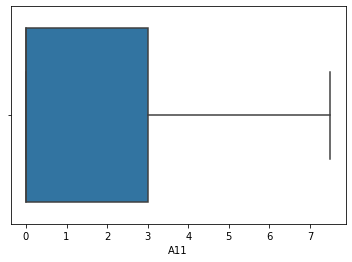

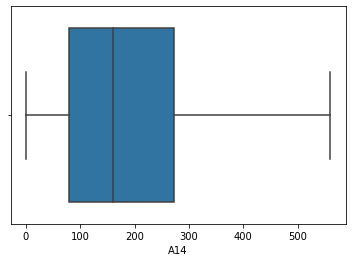

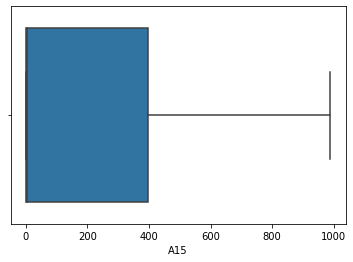

In [213]:
for i in columns:
  sns.boxplot(x=i,data=data)
  plt.show()

#### Encoding - Convert categorical values to Numerical

In [214]:
cat_columns1

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

##### One-Hot Encoding

In [215]:
data = pd.get_dummies(data, prefix=['A1', 'A4', 'A5', 'A7', 'A9', 'A10', 'A12', 'A13'], 
                          columns=['A1', 'A4', 'A5', 'A7', 'A9', 'A10', 'A12', 'A13'],drop_first = True )

In [216]:
data.head()

,A2,A3,A6,A8,A11,A14,A15,A16,A1_b,A4_u,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,w,1.25,1.0,202.0,0.0,1,1,1,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,q,3.04,6.0,43.0,560.0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,q,1.50,0.0,280.0,824.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,w,3.75,5.0,100.0,3.0,1,1,1,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,w,1.71,0.0,120.0,0.0,1,1,1,...,0,0,0,1,0,1,0,0,0,1


##### Label Encoding

In [217]:
from sklearn.preprocessing import LabelEncoder

In [218]:
le = LabelEncoder()

In [219]:
data['A6']=le.fit_transform(data['A6'])

In [223]:
pd.set_option("display.max_columns",None)
data.head()

,A2,A3,A6,A8,A11,A14,A15,A16,A1_b,A4_u,A4_y,A5_gg,A5_p,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,12,1.25,1.0,202.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,10,3.04,6.0,43.0,560.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,10,1.50,0.0,280.0,824.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,12,3.75,5.0,100.0,3.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,12,1.71,0.0,120.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


#### Feature Scaling

##### Train-Test Split

In [225]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=221)

In [227]:
X_train.shape

(482, 25)

In [228]:
X_test.shape

(208, 25)

In [233]:
y_train

325    0
205    0
644    0
425    0
249    0
      ..
318    1
359    0
264    0
483    0
180    0
Name: A13_s, Length: 482, dtype: uint8

##### Standard scaler

In [229]:
Scale_standard = StandardScaler()

In [230]:
X_train_scaled = Scale_standard.fit_transform(X_train)

In [231]:
X_train_scaled

array([[-0.185812  , -0.78329443,  1.67922498, ..., -0.88610676,
        -0.93958102, -0.11227218],
       [ 0.3257106 ,  1.62207994,  0.9776476 , ...,  1.12853219,
        -0.93958102, -0.11227218],
       [ 0.39051498, -0.92984266,  1.44536585, ..., -0.88610676,
         1.06430417, -0.11227218],
       ...,
       [ 1.6503122 , -0.89348107, -0.19164804, ..., -0.88610676,
        -0.93958102, -0.11227218],
       [-0.68264561, -0.93094453, -1.12708455, ...,  1.12853219,
        -0.93958102, -0.11227218],
       [ 1.3841822 , -0.95849119, -1.12708455, ...,  1.12853219,
        -0.93958102, -0.11227218]])

In [232]:
X_test_scaled = Scale_standard.fit_transform(X_test)

#### Feature Selection

In [234]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [235]:
#apply SelectKBest class to extract top k best features
# k is the number of features you want to select [here it's 15]
bestfeatures = SelectKBest(f_classif, k=15)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

    Specs      Score
22  A10_t  28.273017
4     A11  18.151107
6     A15  17.492111
5     A14   8.206999
1      A3   6.886666
7     A16   5.627270
11  A5_gg   5.292523
21   A9_t   5.255707
8    A1_b   2.803223
19   A7_v   1.465605
15   A7_h   1.110806
23  A12_t   0.540314
16   A7_j   0.488872
20   A7_z   0.488872
24  A13_p   0.488872
